<a href="https://colab.research.google.com/github/Jozefina-Gramatikova/A-B-Test/blob/main/A_B_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
from matplotlib.cbook import boxplot_stats  
from sklearn.ensemble import IsolationForest
from scipy import stats

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/exercise3_ab_test.csv') #importing the excel file file

In [ ]:
df.head(5) #making sure that it has been imported by printing the first 5 rows

,user_id,Variant,Revenue
0,562625,Control,43.34
1,935989,Test,51.05
2,676822,Test,61.13
3,933683,Test,45.85
4,967127,Test,48.10


Exploratory Data Anlysis

In [ ]:
df.describe() #checking the most important statistics of both "Control" and "Test" together

,user_id,Revenue
count,19561.000000,19561.000000
mean,549669.679004,52.662342
std,259109.419075,16.813468
min,100016.000000,20.220000
25%,327861.000000,46.210000
50%,548916.000000,50.920000
75%,773791.000000,56.990000
max,999950.000000,951.030000


In [ ]:
df[df['Variant']=='Test'].describe() #checking the stats of "Test"

,user_id,Revenue
count,9547.000000,9547.000000
mean,548249.460773,52.406548
std,258377.210094,6.896169
min,100097.000000,35.700000
25%,330206.500000,47.260000
50%,545079.000000,51.370000
75%,770068.000000,56.480000
max,999950.000000,86.380000


In [ ]:
df[df['Variant']=='Control'].describe() #checking the stats for "Control"

,user_id,Revenue
count,10014.000000,10014.000000
mean,551023.665768,52.906208
std,259811.231099,22.511509
min,100016.000000,20.220000
25%,325779.500000,44.900000
50%,553296.500000,50.290000
75%,776331.250000,57.665000
max,999949.000000,951.030000


Now "Control" and "Test" grops can be compared. One can see that the minumum value of "Test"  -- 35.7 is close to the minumimum value of "Control" which is 20.22. The standard devition, however if much larger in the "Control" group, with a value of 22.5, than the "Test" group which is 6.89. There difference in the max values is even bigger where the "Control" group has a value of 951 and the "Test" group -- 86.38. There is a chance that the maximum value of the "Control" group is an outlier and probably there are other outliers in this group. Now, further exploratory analysis will be done in order to find potential outliers.

In [ ]:
#df[(df['Variant']=='Control')&(df['Revenue']<100)].describe()

In [ ]:
df_c= df[df['Variant']=='Control'] #giving the "Control" group data a name, so it's easier to work with it in Python 

In [ ]:
df_c.head(5) #making sure that the name was successfully attached to this group, by printing the first five rows

,user_id,Variant,Revenue
0,562625,Control,43.34
8,557495,Control,53.81
9,275819,Control,50.40
10,550476,Control,48.73
15,677348,Control,41.11


In [ ]:
df_t = df[df['Variant']=='Test'] #giving the "Test" group a name

In [ ]:
df_t.head(5)

,user_id,Variant,Revenue
1,935989,Test,51.05
2,676822,Test,61.13
3,933683,Test,45.85
4,967127,Test,48.10
5,345012,Test,54.59


Text(0.5, 1.0, 'Control')

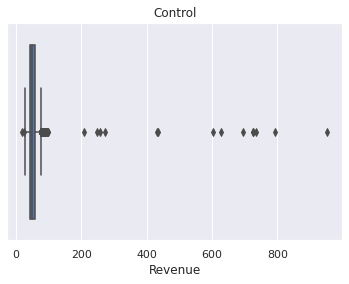

In [ ]:
boxplot_c = sns.boxplot(x=df_c['Revenue'])
boxplot_c.set( xlabel = "Revenue", ylabel = "")
boxplot_c.set_title( "Control")
#printing a boxplot of the Revenue of the "Control" group as this is one way to spot outliers

It can be seen from the boxplot that almost of of the data is lower than 100, and that there are only a few datapoints larger than 200. There is a high chance that those points are outliers. 

In [ ]:
boxplot_stats(df_c['Revenue']) #printing more stats for the "Control" boxplot

[{'cihi': 50.49027035978008,
  'cilo': 50.08972964021992,
  'fliers': array([ 20.22,  24.39,  78.84,  78.19,  79.98,  80.37,  78.72,  87.12,
          78.79,  78.59, 951.03,  78.43,  80.36,  91.66,  82.99,  83.94,
          83.37,  79.11,  88.16, 694.8 ,  89.26,  82.25, 733.69,  81.22,
          81.75,  80.73, 628.6 ,  85.02,  76.84,  78.45,  83.34,  97.49,
          79.2 ,  85.74,  79.76,  79.85,  78.14,  87.69,  82.06,  79.63,
          79.16,  77.06,  77.96,  88.52,  82.6 ,  80.4 ,  79.01, 207.38,
          85.4 ,  77.14,  83.79,  90.78,  82.28,  81.78,  82.55,  91.46,
          87.64, 603.18,  85.3 ,  80.24,  77.2 ,  81.31,  81.61,  82.48,
          78.81,  76.85,  85.73,  79.35,  77.18,  77.71,  78.36,  84.79,
          87.18,  77.74,  89.57,  82.34,  82.06,  76.83,  77.1 , 791.33,
          89.11,  84.82,  78.22,  82.74,  77.79,  79.21,  83.24,  78.35,
          84.09,  81.01,  78.99,  84.63,  78.46,  78.42,  85.35,  81.2 ,
          79.18,  79.47,  78.59,  79.12,  78.63, 248.61,

Text(0.5, 1.0, 'Test')

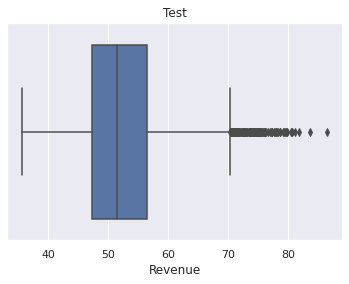

In [ ]:
boxplot_t = sns.boxplot(x=df_t['Revenue']) 
boxplot_t.set( xlabel = "Revenue", ylabel = "")
boxplot_t.set_title( "Test")
#printing the boxplot for the "Test" group

It looks like there is a much lower chance of having outliers here as the majority of the data is contained up until a Revenue of 70. The datapoints which are higher than 70 are placed very close to each other so probably they wouldn't be outliers.

Text(0.5, 1.0, 'Test')

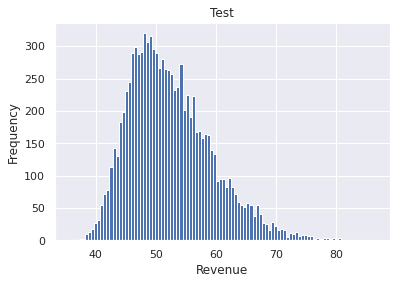

In [ ]:
test_hist = df_t['Revenue'].plot(kind='hist', bins = 100); 
test_hist.set( xlabel = "Revenue", ylabel = "Frequency")
test_hist.set_title("Test")
#printing a histogram of the "Test" group

This histogram gives us a better understanding of the "Test" group revenue data and how it is distributed.

In [ ]:
df_t["Revenue"].mode() # double-checking the mode of the "Test" group revenue histogram

0    46.21
dtype: float64

Text(0.5, 1.0, 'Control')

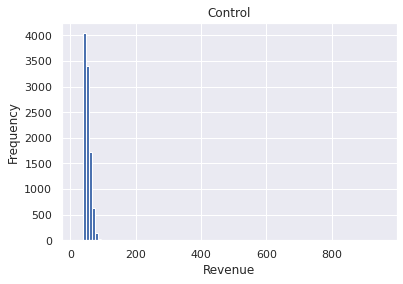

In [ ]:
control_hist = df_c['Revenue'].plot(kind='hist', bins = 100);
control_hist.set( xlabel = "Revenue", ylabel = "Frequency")
control_hist.set_title("Control")
#printing a histogram of the "Control" group

The "Control" group histogram shows that all of the data is contained below revenue value of a hundred. The number of data points that we saw earlier on the boxplot that are higher that 200, is probably so small that it is negligible to the rest of the data. This is another endication that they probably are outliers.

Text(0.5, 1.0, 'Control group for  Revenue<100')

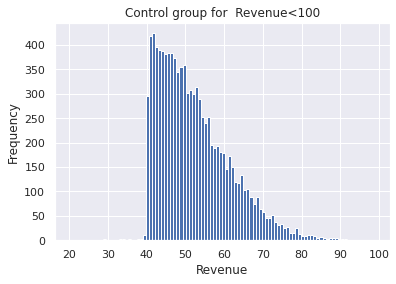

In [ ]:
df_c_o=df[(df['Variant']=='Control')&(df['Revenue']<100)] #giving a name of the group of the data points in the "Control" group that are lower than a hundred
control_hist_100 = df_c_o['Revenue'].plot(kind='hist', bins = 100);
control_hist_100.set( xlabel = "Revenue", ylabel = "Frequency")
control_hist_100.set_title("Control group for  Revenue<100")
#printing the histogram

Printing the "Control" group histogram for values lower than a hundred gives us a better understanding of the shape of this histogram. We can see that the this is not a normal distribution -- the data is right-skewed. Therefore, we can't perform the methods for outlier detection and removal for a normal distribution.

In [ ]:
print(df_c['Revenue'].skew()) #checking the "skewness" of the "Control" group data

24.683515872732663


If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. The "Control" group distrubution is highly skewed.

In [ ]:
print(df_t['Revenue'].skew()) #checking the "skewness" of the "Test" group data

0.7654616177032911


The "Test" group distrubution is moderately skewed.

On the "Control" group histogram data one could see that there are no values below 38. If one plots the histogram within the range $>38$ and $<100$ , the shape of the histogram could be seen more clearly. The statistics plot in the beginning of the code showed that the minimum revenue value of the "Control" group is 20.22, but we are going to set it to 38 first just for a better visual representation of the majority of the data.

In [ ]:
df_c_j=df[(df['Variant']=='Control')&(df['Revenue']>38)&(df['Revenue']<100)] 

Text(0.5, 1.0, 'Control group 38<Revenue<100')

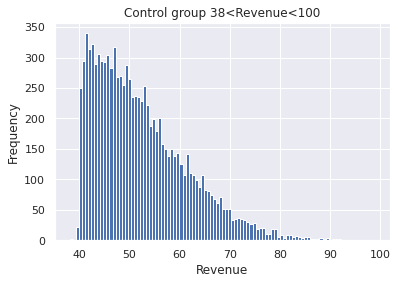

In [ ]:
control_hist_38_100 =  df_c_j['Revenue'].plot(kind='hist', bins = 100);
control_hist_38_100.set( xlabel = "Revenue", ylabel = "Frequency")
control_hist_38_100.set_title("Control group 38<Revenue<100")

Checking the potential outliers part of the "Control" group histogram

In [ ]:
df_c_s=df[(df['Variant']=='Control')&(df['Revenue']>19)&(df['Revenue']<40)] 

Text(0.5, 1.0, 'Control group 19<Revenue<40')

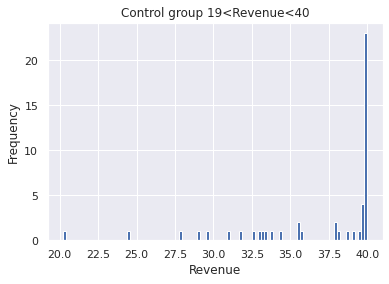

In [ ]:
control_hist_19_40 =  df_c_s['Revenue'].plot(kind='hist', bins = 100);
control_hist_19_40.set( xlabel = "Revenue", ylabel = "Frequency")
control_hist_19_40.set_title("Control group 19<Revenue<40")

The "Control" group histogram for values between 19 and 40 shows that there are very few datapoints in that range.

In [ ]:
df_c_p=df[(df['Variant']=='Control')&(df['Revenue']>100)]

Text(0.5, 1.0, 'Control group Revenue>100')

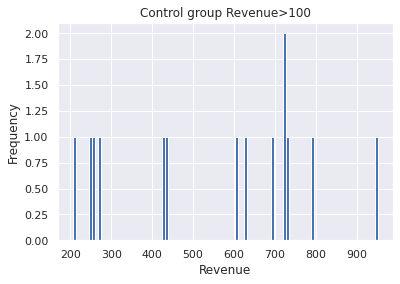

In [ ]:
control_hist_larger_100 = df_c_p['Revenue'].plot(kind='hist', bins = 100);
control_hist_larger_100.set( xlabel = "Revenue", ylabel = "Frequency")
control_hist_larger_100.set_title("Control group Revenue>100")

The "Frequency" shows a value of 1 or 2, which means that there are almost no datapoints $>100$ as is was suspected earler, but this histogram gives a better visual representation of them.

In [ ]:
df_c_m=df[(df['Variant']=='Control')&(df['Revenue']>80)&(df['Revenue']<300)]

Text(0.5, 1.0, 'Control group 80<Revenue<300')

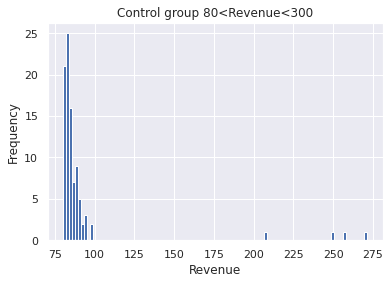

In [ ]:
control_hist_80_300 = df_c_m['Revenue'].plot(kind='hist', bins = 100);
control_hist_80_300.set( xlabel = "Revenue", ylabel = "Frequency")
control_hist_80_300.set_title("Control group 80<Revenue<300")

The "Control" group histogram for values between 80 and 300 gives a better visual representation of where the potential real data ends. It is also easier to compare that data with the potentual outliers. One can see that there are no values between 100 and 200, which is a huge gap, having in mind that the majority of the data is between 20 and 100.

In [ ]:
outliers_counter = len(df_c[df_c['Revenue'] > 100]) 
outliers_counter

14

The number of potential outliers of datapoints $>100$ has been found to be only 14. The total count of the datapoints in the "Control" group in the beginning of the code was found to be 10014. One can do the ratio of both to see the percentage of the potentiall outliers:

In [ ]:
100*(14/10014)

0.13980427401637707

This is only 0.14% of the data. This is well withing the outlier range of any data. This could be data that has been recorded in a wrong way. Alternatively, this could be true data for only 0.14% of purchases. Unless there is more information about those purchases, such as the time when was it made, the location and such, this data should be considered as outliers. If additional data could be provided to analyse these data points further, that would be beneficial.
Let's bring the statistics for the "Test" group and the "Control" group excluding the outliers:

In [ ]:
df[df['Variant']=='Test'].describe() #checking the stats of "Test"

,user_id,Revenue
count,9547.000000,9547.000000
mean,548249.460773,52.406548
std,258377.210094,6.896169
min,100097.000000,35.700000
25%,330206.500000,47.260000
50%,545079.000000,51.370000
75%,770068.000000,56.480000
max,999950.000000,86.380000


In [ ]:
df[(df['Variant']=='Control')&(df['Revenue']<100)].describe() #checking the stats for "Control" excluding outliers

,user_id,Revenue
count,10000.000000,10000.000000
mean,551138.775100,52.209803
std,259778.404479,9.286563
min,100016.000000,20.220000
25%,325861.250000,44.900000
50%,553434.500000,50.270000
75%,776391.500000,57.630000
max,999949.000000,98.770000


Since the two groups are of a different size - The "Test" group has 9547 datapoints and the "Control" group has a value of 10000 datapoints, it is best to use the mean in order to determine which group would bring greater revenue. Simply doing the sum of both wouldn't be fair. The mean is the sum of all values in the dataset divided by the number of all points in the dataset. The mean for the "Test" group with a value of 52.4 is a little bit larger than the mean of the "Control" group with a value of 52.2. The "50%" of the table shows the middle 50% of the data which is less prone to be outlier data it is known as Interquartile range (IQR). It can be observed that again the "Test" also group has a greater value of 51.37 compared to the "Control" group which is 50.27. However due to the small difference between the two, additional statistical methods have to be used before any conclusions are made.

# T-test
A t-test is an univariate test that tests for a significant difference between the mean of two unrelated groups. I am chosing to do it in order to find out whether the "Control" group or "Test" group would bring a higher revenue.
"Null hypothesis" $(H_{0}): u1 = u2$, which translates to the mean of sample 1 is equal to the mean of sample 2.
The "Alternative hypothesis" $(H_{A}): u1 ≠ u2$, which translates to the mean of sample 1 is not equal to the mean of sample 2. A null hypothesis can only be rejected, not proven. A p-value that is less than or equal to 0.05 often indicates whether there is evidence against the null hypothesis.

One of the steps we need to do before we can do the t-test is to check if our distributions are normal:

In [146]:
print(df_c_o['Revenue'].skew()) #Checking the skewness of the "Control" group excluding the outliers

0.9759283329278715


In [147]:
print(df_t['Revenue'].skew()) #checking the "skewness" of the "Test" group data

0.7654616177032911


Both datasets are moderately skewed with the "Control" group dataset being more skewed than the "Test", but still the skewness is not greater than 1.

Let’s see how it looks on a q-q plot, it’s easier to get a sense of normality visualizing the data as q-q plot.

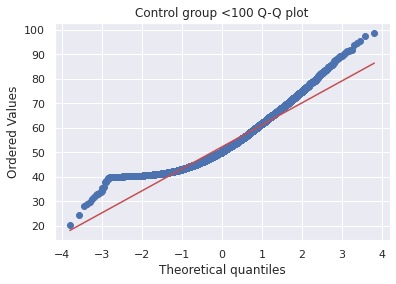

In [179]:
stats.probplot(df_c_o['Revenue'], dist="norm", plot= plt)
plt.title("Control group <100 Q-Q plot")
plt.savefig("Control group <100")

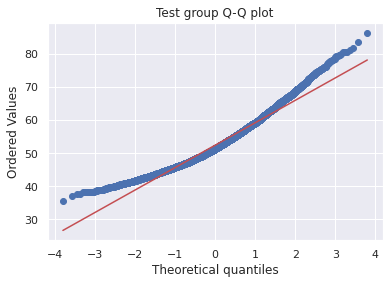

In [180]:
stats.probplot(df_t['Revenue'], dist="norm", plot= plt)
plt.title("Test group Q-Q plot")
plt.savefig("Test group")

Both "Test" and "Control" groups have a close to normal distribution. There is some deviation from normality on both, but it does not appear to be a large violation. Therefore, a t-test can be performed:


In [173]:
stats.ttest_ind(df_c_o['Revenue'], df_t['Revenue'])

Ttest_indResult(statistic=-1.6754719973240766, pvalue=0.09385765675288062)

The p-value=0.09>0.05 therefore the null hypothesis can't be rejected. 

# Conclusion
The two datasets from the "Test" and "Control" group show that they have almost the same mean (after the outliers have been removed), and a group which will bring more revenue can't be defined. This was shown with the "describe" method first - the mean of the "Control" group is 52.2 and the mean of the "Test" group is 52.4. The fact that the two means are too close to each other was also proven with the t-test which gave a p-value of 0.09, which is larger than 0.05. Therefore, the null hypothesis can't be rejected and there is no statistical significance between the two groups. The small difference between the two means is explainable by chance alone.